In [86]:
%matplotlib widget
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [87]:
universal_grav_constant = 6.674e-11
earth_mass = 5.972e24

x0 = 1
y0 = 1
z0 = 1
position_offset = [x0, y0, z0]
t = np.linspace(0, 2*np.pi, 200)

In [88]:
def degrees_to_radians(degrees):
    return degrees * (np.pi / 180)

In [89]:
# Satellite keplar conditions to convert

max_alt = 418000 + 6371 * 1000
min_alt = 417000 + 6371 * 1000

eccentricity = 0.00051

semi_major_axis= (max_alt + min_alt)  / 2

semi_minor_axis = semi_major_axis * np.sqrt(1 - eccentricity ** 2)


inclination = degrees_to_radians(51.6434)
argument_of_periapsis = degrees_to_radians(13.8511)
long_asc_node = degrees_to_radians(21.3671)
true_anomaly = degrees_to_radians(98.5566)

starting_point_x = semi_major_axis * np.cos(true_anomaly)
starting_point_y = semi_minor_axis * np.sin(true_anomaly)
starting_point_z = 0

starting_vector = np.array([starting_point_x, starting_point_y, starting_point_z])

[-2635196.87770904  2995485.36951415  5492407.21825102]


(-5000000.0, 5000000.0)

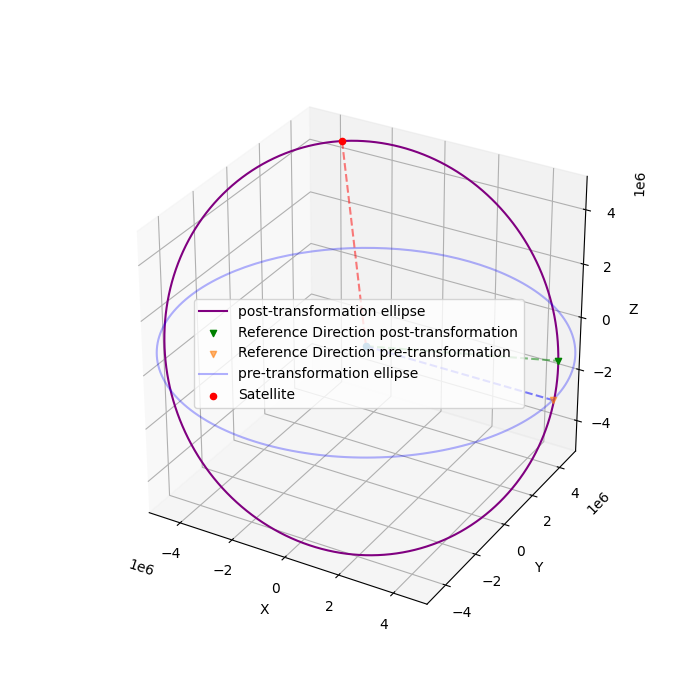

In [90]:
# Graphing section
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])

ax.set_xlabel('X')

ax.set_ylabel('Y')

ax.set_zlabel('Z')


#x_scalar = x0 + a*np.cos(t)
#y_scalar = t
#z_scalar = t

x_ellipse_mag = np.cos(t)

y_ellipse = np.sin(t)

z_ellipse = t * 0

base_ellipse = np.array([x_ellipse_mag * semi_major_axis, y_ellipse * semi_minor_axis, z_ellipse])

# Z axis rotation (Longitude of ascending node)
Rotation_Matrix_1 = np.identity(3)
Rotation_Matrix_1[0][0] = np.cos(argument_of_periapsis)
Rotation_Matrix_1[0][1] = - np.sin(argument_of_periapsis)
Rotation_Matrix_1[1][0] = np.sin(argument_of_periapsis)
Rotation_Matrix_1[1][1] = np.cos(argument_of_periapsis)

#Rotation_Matrix_1 = np.matmul(Rotation_Matrix_1, Scaling_Factor)

# X axis rotation (inclination)
Rotation_Matrix_2_Cardinal = np.identity(3)

Rotation_Matrix_2_Cardinal[1][1] = np.cos(inclination)
Rotation_Matrix_2_Cardinal[1][2] = - np.sin(inclination)
Rotation_Matrix_2_Cardinal[2][1] = np.sin(inclination)
Rotation_Matrix_2_Cardinal[2][2] = np.cos(inclination)

Rotation_Matrix_2_Scaled = np.matmul(Rotation_Matrix_1, Rotation_Matrix_2_Cardinal)

# Y axis rotation (Argument of periapsis) (Cardinal)

Rotation_Matrix_3 = np.identity(3)

Rotation_Matrix_3[0][0] = np.cos(long_asc_node)
Rotation_Matrix_3[0][2] = np.sin(long_asc_node)
Rotation_Matrix_3[2][0] = - np.sin(long_asc_node)
Rotation_Matrix_3[2][2] = np.cos(long_asc_node)

# Scale the rotation by the total matrix

Full_Rotation_Matrix = np.matmul((np.matmul(Rotation_Matrix_1, Rotation_Matrix_2_Scaled)), Rotation_Matrix_3)

ellipse = np.matmul(Full_Rotation_Matrix, base_ellipse)


# Offset from origin
x_points = ellipse[0] + x0
y_points = ellipse[1] + y0
z_points = ellipse[2] + z0

# Plot ellipse
points = np.array([x_points, y_points, z_points])
plt.plot(points[0], points[1], points[2], color="purple", label = "post-transformation ellipse")

# Centre point

x_centre = x0
y_centre = y0
z_centre = z0

ax.scatter(x_centre, y_centre, z_centre)

# Reference point
ref_matrix = np.array([semi_major_axis,0,0])

ref_matrix  = np.matmul(Full_Rotation_Matrix, ref_matrix)

ax.scatter(ref_matrix[0] + x0, ref_matrix[1] + y0, ref_matrix[2] + z0, color="g", marker="v", label = "Reference Direction post-transformation")


# Base ellipse for comparison

ax.scatter(semi_major_axis+ x0, y0, z0, marker="v", alpha=0.6, label = "Reference Direction pre-transformation")
plt.plot(base_ellipse[0] + x0, base_ellipse[1] + y0, base_ellipse[2] + z0, "b", alpha=0.3, label = "pre-transformation ellipse")

# Important point
final_vector = np.matmul(Full_Rotation_Matrix, starting_vector) + position_offset
ax.scatter(final_vector[0], final_vector[1], final_vector[2], color="red", marker="o", label = "Satellite")



# Line to true anomaly from centre
line_diff = [[x0, final_vector[0]], [y0, final_vector[1]], [z0, final_vector[2]]]
plt.plot(line_diff[0], line_diff[1], line_diff[2], '--', color="red", alpha=0.5)

# Line to reference direction from centre
line_diff_2 = [[x0, ref_matrix[0] + x0], [y0, ref_matrix[1] + y0], [z0, ref_matrix[2] + z0]]
plt.plot(line_diff_2[0], line_diff_2[1], line_diff_2[2], '--',color="green", alpha=0.5)

# Line to base ellipse point from centre
line_diff_3 = [[x0, semi_major_axis+ x0], [y0, y0], [z0, z0]]
plt.plot(line_diff_3[0], line_diff_3[1], line_diff_3[2], '--',color="blue", alpha=0.5)

plt.legend()
graph_scale = 5000000
ax.set_xlim3d(-graph_scale, graph_scale)
ax.set_ylim3d(-graph_scale, graph_scale)
ax.set_zlim3d(-graph_scale, graph_scale)


In [91]:

radius_vector = [final_vector[0] - x0, final_vector[1] - y0, final_vector[2] - z0]
radius = np.linalg.norm(radius_vector)
print(radius_vector)
print(radius)

velocity_mag_simplified = np.sqrt((universal_grav_constant * earth_mass) / radius)

Vx_Simplified = velocity_mag_simplified * np.cos(argument_of_periapsis)
Vy_Simplified = velocity_mag_simplified * np.sin(argument_of_periapsis)

V_Vector_Simplified = np.array([Vx_Simplified, Vy_Simplified, 0])
V_Vector = np.matmul(Full_Rotation_Matrix, V_Vector_Simplified)
print(final_vector)
print(V_Vector)
print(np.linalg.norm(V_Vector))


[-2635197.8777090437, 2995484.3695141464, 5492406.218251016]
6788499.13669938
[4616.81444927 6110.51633369 -243.59605556]
7662.422891073402


In [92]:
class ctrl():
    def __init__(self, ctrl):
        
        self.ctrl = ctrl

Rotation_Matrix = np.zeros([2,2])

Rotation_Matrix[0][0] = np.cos(argument_of_periapsis)
Rotation_Matrix[0][1] = np.sin(argument_of_periapsis)
Rotation_Matrix[1][0] = np.sin(argument_of_periapsis)
Rotation_Matrix[1][1] = - np.cos(argument_of_periapsis)

x_y_points = x_ellipse_mag, y_ellipse

x_y_points = np.matmul(Rotation_Matrix, x_y_points)

z_ellipse = x_y_points[0] * np.sin(inclination) * np.sin(argument_of_periapsis)

x_ellipse = x_y_points[0] * np.cos(inclination) * np.sin(argument_of_periapsis)

points = np.array([x_ellipse, x_y_points[1], z_ellipse])



x_points = points[0] + x0
y_points = points[1] + y0
z_points = points[2] + z0

points = np.array([x_points, y_points, z_points])
plt.plot(points[0], points[1], points[2])


ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)